<a href="https://colab.research.google.com/github/Bloch-AI/BlochAI-LargeLanguageModel/blob/master/A1NaiveBayesPima(Kaggle)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import files
files.upload()   # This will open a file picker dialog

Saving pima-indians-diabetes.csv to pima-indians-diabetes (2).csv


{'pima-indians-diabetes (2).csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2,VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
dataset = pd.read_csv('pima-indians-diabetes.csv')
print(dataset)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

These three lines are preparing your data for a machine learning model. They:

Show you some descriptive statistics of your data.

Separate the dataset into X (features used for prediction) and y (the target you want to predict).

This separation is crucial for training and evaluating machine learning models.

In [48]:
print(dataset.describe())
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

The line sns.heatmap(X.corr(), annot = True) creates a heatmap that visualizes the correlation between the features in your dataset X. The heatmap uses color to represent the strength and direction of the correlations, and the annot = True argument displays the correlation values directly on the heatmap for better readability. This helps you understand which features are strongly related to each other and which are relatively independent.

<Axes: >

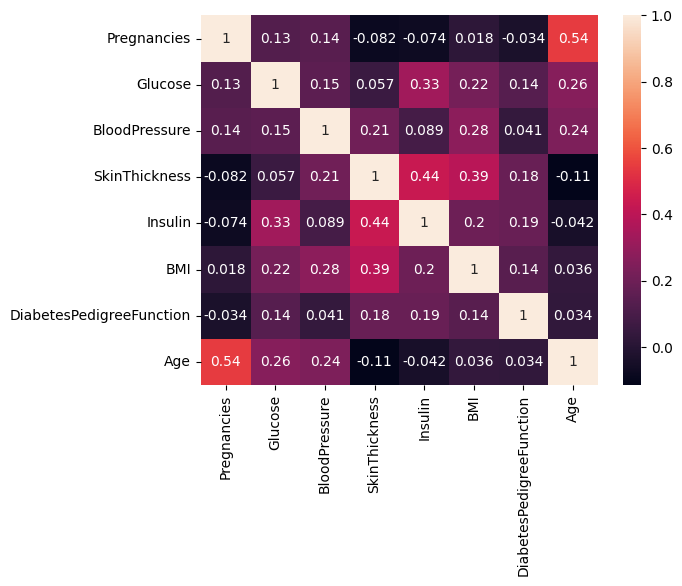

In [49]:
sns.heatmap(X.corr(), annot = True)

The code identifies columns where a value of 0 is likely an error or a placeholder for missing data. It replaces these 0s with the average value of the other entries in the same column. This technique is called imputation and is commonly used to handle missing data in a way that doesn't drastically distort the dataset's overall statistics. It essentially fills in the gaps with a reasonable estimate based on the existing data.

In [50]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    X[column] = X[column].replace(0, np.NaN)
    mean = int(X[column].mean(skipna=True))
    X[column] = X[column].replace(np.NaN, mean)

In essence, this code snippet performs feature selection using variance thresholding and the chi-squared test. It aims to reduce the number of features used in the model, keeping only the most relevant ones that contribute to predicting diabetes. This helps in simplifying the model, potentially improving its performance and making it easier to interpret.

In [51]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_filtered = sel.fit_transform(X)
print(X.head(1))
print(X_filtered[0])
#DiabetesPedigreeFunction was dropped
if 'DiabetesPedigreeFunction' in X.columns:
    X = X.drop('DiabetesPedigreeFunction', axis=1)
else:
    print("Column 'DiabetesPedigreeFunction' not found in DataFrame")

top_4_features = SelectKBest(score_func=chi2, k=4)
X_top_4_features = top_4_features.fit_transform(X, y)
print(X.head())
print(X_top_4_features)
X = X[['Glucose', 'Insulin', 'BMI', 'Age']]  # Keep only the top 4 features
top_4_features = SelectKBest(score_func=chi2, k=4)
X_top_4_features = top_4_features.fit_transform(X, y)
print(X.head())
print(X_top_4_features)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    155.0  33.6   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
[  6.  148.   72.   35.  155.   33.6  50. ]
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age
0            6    148.0           72.0           35.0    155.0  33.6   50
1            1     85.0           66.0           29.0    155.0  26.6   31
2            8    183.0           64.0           29.0    155.0  23.3   32
3            1     89.0           66.0           23.0     94.0  28.1   21
4            0    137.0           40.0           35.0    168.0  43.1   33
[[  6. 148. 155.  50.]
 [  1.  85. 155.  31.]
 [  8. 183. 155.  32.]
 ...
 [  5. 121. 112.  30.]
 [  1. 126. 155.  47.]
 [  1.  93. 155.  23.]]
   Glucose  Insulin   BMI  Age
0    148.0    155.0  33.6   50
1     85.0    155.0  26.6   31
2    183.0    155.0  23.3   32
3     89.0     94.0  28.1   2

In simple terms, imagine you have a deck of cards. This line of code is like shuffling the deck (random_state) and then dealing out 80% of the cards for practice (X_train, y_train) and the remaining 20% for a final test (X_test, y_test). This helps you see how well your model generalizes to unseen data.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

This code is performing a process called feature scaling, specifically using a technique called standardization. Many machine learning algorithms perform better when the features are on a similar scale. Standardization helps prevent features with larger values from dominating the model and ensures that all features contribute equally to the learning process. This can lead to improved model accuracy and stability

In [53]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

These two lines of code create and train a Gaussian Naive Bayes classifier using the training data (X_train and y_train). The trained classifier will then be used to make predictions on new data.

In [54]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

You've trained your model to identify potential diabetes based on certain features. Now, you're giving the model new data (X_test) and asking it to predict whether each individual in that data has diabetes or not. The predictions are stored in y_pred.

This step is crucial for evaluating how well your model generalizes to new, unseen data. You'll compare these predictions (y_pred) with the actual outcomes (y_test) to see how accurate the model is in its predictions.

In [55]:
y_pred = classifier.predict(X_test)

In essence, this code segment is like a report card for the machine learning model, showing how well it's doing in its predictions using different evaluation metrics. The confusion matrix gives a detailed breakdown of the types of errors the model makes, while the F1 score and accuracy provide overall performance summaries.

In [56]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[96 11]
 [21 26]]
0.6190476190476191
0.7922077922077922
